In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import SimpleExpSmoothing, Holt

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
vacc_data = pd.read_excel("vaccination_data.xlsx",sheet_name='Sheet2',header=1,engine='openpyxl')

In [3]:
vacc_data.head()

,DATE,FIRST,SECOND
0,2021-08-21,10594203,6057341
1,2021-08-20,10430722,5913323
2,2021-08-19,10272611,5771199
3,2021-08-18,10110379,5627554
4,2021-08-17,9966261,5498928


In [4]:
vacc_data.sort_values(by='DATE',inplace=True)

In [5]:
vacc_data.dtypes

DATE      datetime64[ns]
FIRST              int64
SECOND             int64
dtype: object

In [6]:
vacc_data.set_index('DATE',inplace=True)

In [7]:
vacc_data.head()

,FIRST,SECOND
DATE,,
2021-02-15,0,0
2021-02-16,0,0
2021-02-17,0,0
2021-02-18,0,0
2021-02-19,0,0


In [8]:
vacc_data.tail()

,FIRST,SECOND
DATE,,
2021-08-17,9966261,5498928
2021-08-18,10110379,5627554
2021-08-19,10272611,5771199
2021-08-20,10430722,5913323
2021-08-21,10594203,6057341


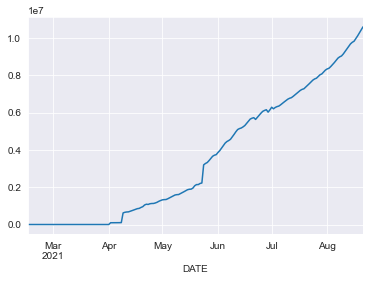

In [13]:
vacc_data['FIRST'].plot();

In [10]:
fit1 = SimpleExpSmoothing(vacc_data['FIRST'], initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)

fcast1 = fit1.forecast(30)

In [11]:
fcast1

2021-08-22    1.004284e+07
2021-08-23    1.004284e+07
2021-08-24    1.004284e+07
2021-08-25    1.004284e+07
2021-08-26    1.004284e+07
2021-08-27    1.004284e+07
2021-08-28    1.004284e+07
2021-08-29    1.004284e+07
2021-08-30    1.004284e+07
2021-08-31    1.004284e+07
2021-09-01    1.004284e+07
2021-09-02    1.004284e+07
2021-09-03    1.004284e+07
2021-09-04    1.004284e+07
2021-09-05    1.004284e+07
2021-09-06    1.004284e+07
2021-09-07    1.004284e+07
2021-09-08    1.004284e+07
2021-09-09    1.004284e+07
2021-09-10    1.004284e+07
2021-09-11    1.004284e+07
2021-09-12    1.004284e+07
2021-09-13    1.004284e+07
2021-09-14    1.004284e+07
2021-09-15    1.004284e+07
2021-09-16    1.004284e+07
2021-09-17    1.004284e+07
2021-09-18    1.004284e+07
2021-09-19    1.004284e+07
2021-09-20    1.004284e+07
Freq: D, dtype: float64

In [20]:
fit1 = Holt(vacc_data['FIRST'], initialization_method="estimated").fit(smoothing_level=0.8, 
                                                                       smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(30).rename("Forecast values")

In [21]:
forecast_first = pd.DataFrame(fcast1)
forecast_first.head()

,Forecast values
2021-08-22,1.072299e+07
2021-08-23,1.086024e+07
2021-08-24,1.099749e+07
2021-08-25,1.113473e+07
2021-08-26,1.127198e+07


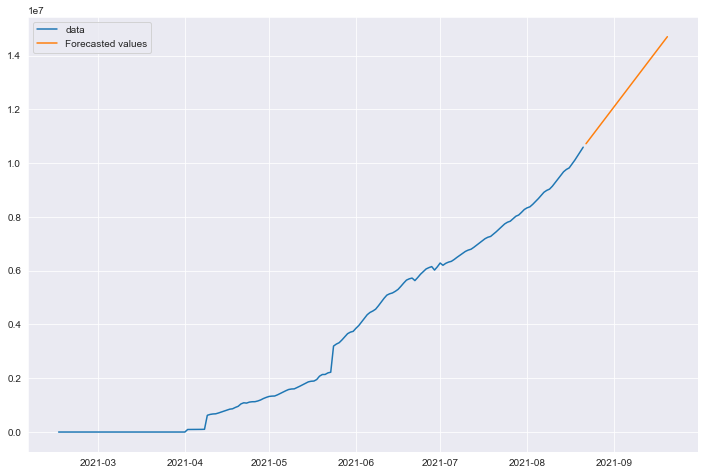

In [30]:
# plot the forecasts
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(vacc_data['FIRST'],label='data') 
ax.plot(forecast_first['Forecast values'],label='Forecasted values')

#y_min, y_max = plt. ylim()

#scale_factor = 0.1
#plt.ylim(ymin*scale_factor,y_max*scale_factor)
plt.yscale('linear')
plt.legend()
plt.show()

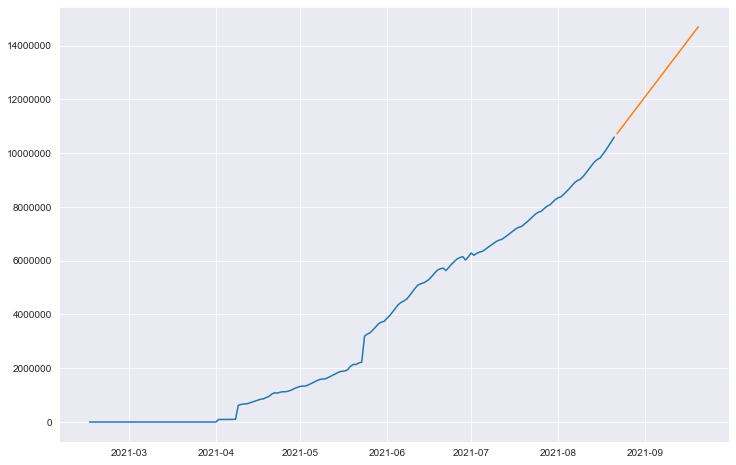

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

ax.plot(vacc_data['FIRST'],label='data') 
ax.plot(forecast_first['Forecast values'],label='Forecasted values')

In [34]:
fig.savefig("vacc_forecast.png")